<a href="https://colab.research.google.com/github/ACobo98/Machine_Learning_Autonomus/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis
Advanced mathematical techniques for analyzing temporal daat in physics and computational scienses

## Time Series Analysis for Physics & Computer Science

**What is a Time Series?**

A time series is a set of data points collected durnig a time lapse, each observation is index by time.

**Common Physics Applications:**

* **Mechanical Oscilations**
* **Electrical Circuits**
* **Enviromental Monitoring**
* **Spectroscopy**

The primary goal is to **describe underlying patterns, analyze system behavior, and predict future dynamics** based on historical observations.

**Why Study Time Series Analyssi**
* **Extract Hidden Patterns:** Discover periodicity, memory effects, and temporal correlation. These patterns often reveal fundamental physical processes.
* **Predictive Modeling:** Forecast future system states based on historical behaviour.
* **Signal Enhancement:** Separate meningful signals from background noise.
* **Model Validation:** Connect experimental data with theoretical models.
* **Big Data Processing:** Handle large datasets efficiently.

****

## Autocorrelation-Mathematical Foundation

Measures the **linear relationship between a time series and a time-shifted version of itself.** Reveals how past values influence current observations.

$R(τ)=\frac{1}{N-\tau} \sum_{t=1}^{N-\tau}(x_t-\bar{x})(x_{t+\tau}-\bar{x}) $

where $τ$ represents the time lag, $N$ is the series lenght, and $\bar{x}$ is the sample mean.

**Key applications:**

* Detecting periodic behaviors in oscillatroy systems.
* Measuring memory effects and temporal dependencies.
* Assesing noise characteristics and signal quality.

**Example:**

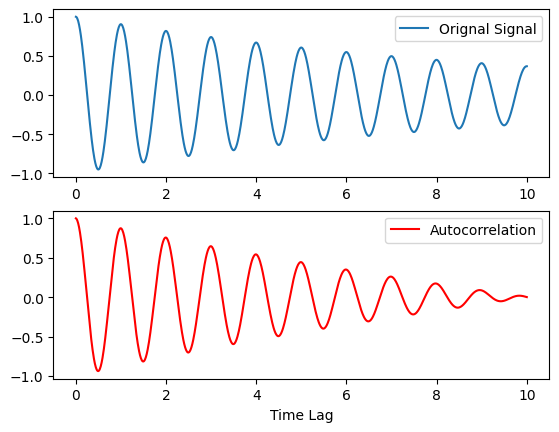

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample signal: samped oscillation
t = np.linspace(0, 10, 1000)
x = np.exp(-0.1*t) * np.cos(2*np.pi*t)

#Calculate autocorrelation
x_centered =  x - np.mean(x)
acf = np.correlate(x_centered, x_centered, mode='full')
acf = acf[acf.size//2:] / np.max(acf)

# Plot
plt.subplot(2,1,1)
plt.plot(t, x, label='Orignal Signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t, acf, label='Autocorrelation', color='red')
plt.xlabel('Time Lag')
plt.legend()
plt.show()

****
## ARIMA Models: Comprehensive Framework

Three Components:
1. **AutoRegressive (AR):** Current values depend on past values with linear relationships. Models systems with memory effects where previous states influence current behavior.
2. **Integrated (I):** Differencnig removes trends and achieves stationarity. Esential for handling data with systematic drift or long-term evolution.
3. **Moving Average (MA):** Current values deped on past residual errors. Captures short-terms fluctations and noise characteristics in the systems.

General **ARIMA(p,d,q)** Mathematical Form:

$\Delta^d x_t=c+\sum_{i=1}^p \phi_i\Delta^d _{t-i}x_{t-1}+ϵ_t+\sum_{j=1}^q θ_j ϵ_{t-j}$

where $p$ is the AR order, $d$ is the degree of differencing, $q$ is the MA order, and $ϵ_t$ represents white noise innovation.




/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


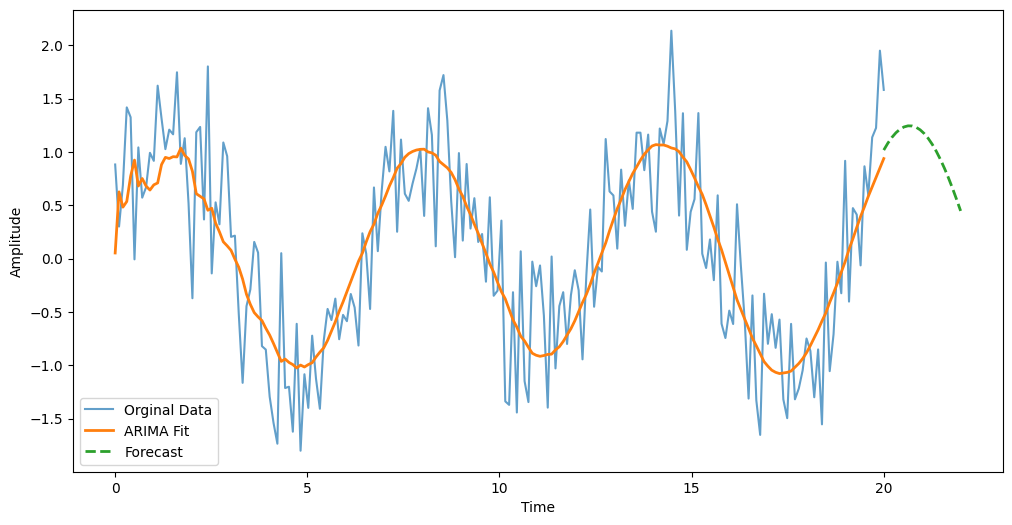

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -149.673
Date:                Mon, 29 Sep 2025   AIC                            311.346
Time:                        02:56:17   BIC                            331.136
Sample:                             0   HQIC                           319.355
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0527      0.056      0.945      0.345      -0.057       0.162
ar.L1          1.9897      0.001   1638.033      0.000       1.987       1.992
ar.L2         -0.9994      0.001   -844.673      0.0

In [3]:
#ARIMA modeling on noisy sinusoidal data, typical of experimental measurements with both systematic oscillations and random noise.
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

#Generate sample noisy sinusoidal data
np.random.seed(0)
t=np.linspace(0, 20, 200)
x=np.sin(t) + 0.5*np.random.randn(200)

#Fit ARIMA Model
#Order (2,0,2): AR(2)+MA(2) no differencing needed
model = sm.tsa.ARIMA(x, order=(2, 0, 2))
result = model.fit()

#Generate predictions
predictions = result.fittedvalues
forecast = result.forecast(steps=20)

#Visualization
plt.figure(figsize=(12,6))
plt.plot(t, x, label="Orginal Data", alpha=0.7)
plt.plot(t, predictions, label="ARIMA Fit", linewidth=2)
plt.plot(np.linspace(20,22,20), forecast, label="Forecast", linestyle='--', linewidth=2)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

#Displaay model summary
print(result.summary())


****
## Fourier Analysis: Frequency Domain Perspective
Fourier analysis decomposes complex time-domain signals into thei constituent sine and cosine frequency components. The transformation reveals the spectral content of temporal data.

**Continuous Fourier Transform:**
$X(f)=\int_{-∞}^{∞}x(t) e^{-2πift}dt$

**Key properties:**
* **Linearity:** Superpositoin principle applies.
* **Time-frequency duality:** Narrow pulses have broad spectra.
* **Energy conservation:** Parseval's theorem.
* **Phase Information:** Complete signal reconstruction possible.

The Fourier transform is **fundamental to understanding wave phenomena, resonance, and spectroscopy** across all branches of physics.

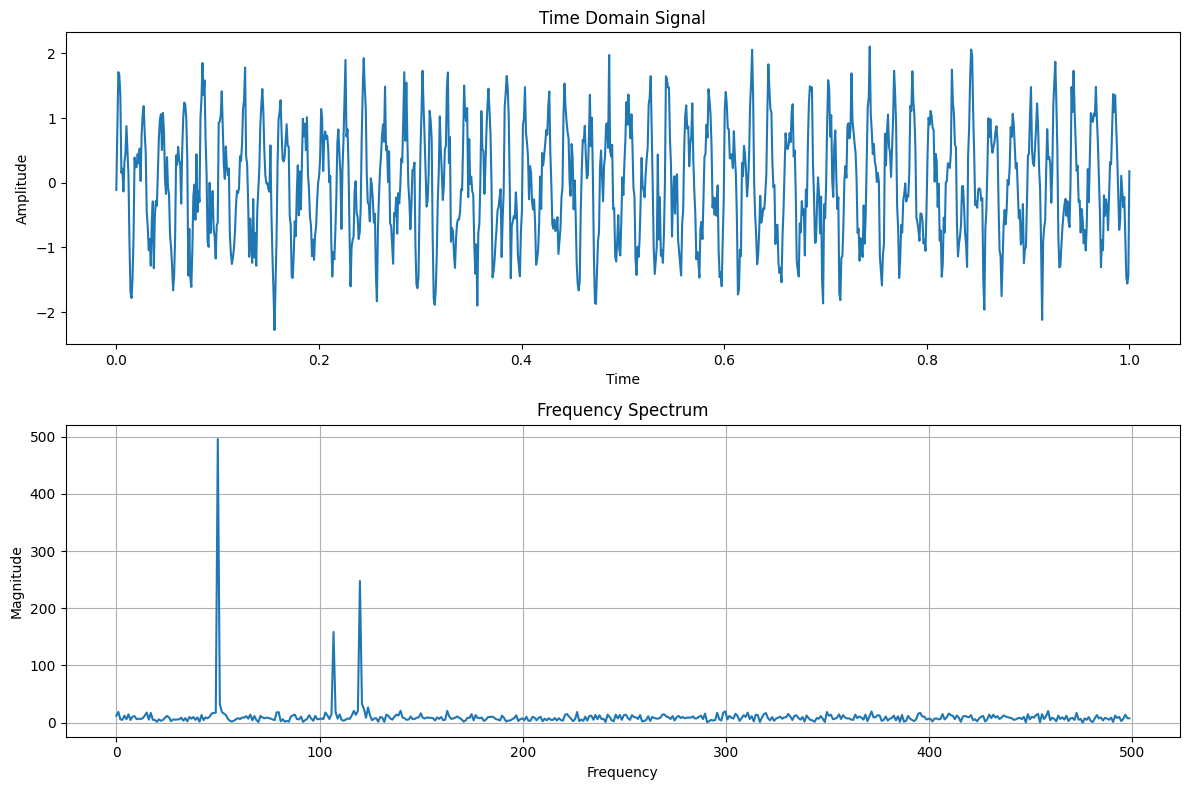

In [4]:
from numpy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

#Complex signal: multiple frequencies +noise
t = np.linspace(0, 1, 1000)
signal = (np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t) + 0.3*np.sin(2*np.pi*107*t) + 0.3*np.random.randn(len(t)))

#Compute FFT
yf = fft(signal)
xf = fftfreq(len(t), t[1]-t[0])

#Plot frequency spectrum
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Time Domain Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(xf[:len(signal)//2], np.abs(yf[:len(signal)//2]))
plt.title("Frequency Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.grid(True)
plt.show()



###Limitations of Fourier Analysis:
* **No Temporal Localitazion:** Fourier transforms provide **global frequency information but lose all time-specific details.** You know what frequencies are present, but not when they occur.
* **Stationary Assumption:** Stndard Fourier analysis assumes **signal properties remain constant over time.** This fails fro transient events, or time-varying systems.
* **Resolution Trade-off:** The ***uncertaty principle limits simultaneous time and frequency resolution.* Better frequency resolution requires longer observation times.

**Solution: Wavelet transform**

Wavelets overcome these limitations by providing simultaneous time and frequency
localization, making them ideal for analyzing non-stationary signals and transient
phenomena.


****
## Wavelet Analysis: Time-Frequency Localization

Wavelet analysis uses **localized basis functions** that are scaled and shifted to analyze signals in both time and frequency domains simultaneously.

**Continuous wavelet**

$W(a,b)=\frac{1}{\sqrt{|a|}}\int x(t) \psi \left(\frac{t-b}{a}\right)dt$

where:
* a=scale parameter (inverse of freuency).
* b=translation parameter (time shift).
* $\psi(t)$=motherwavelet function.
**Key Advantages:**
* Preserves both time and frequency information.
* Adaptive resolution: good time resolution at high frequencies.
* Ideal for transient and non-stationary signals.

/tmp/ipython-input-1513925013.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


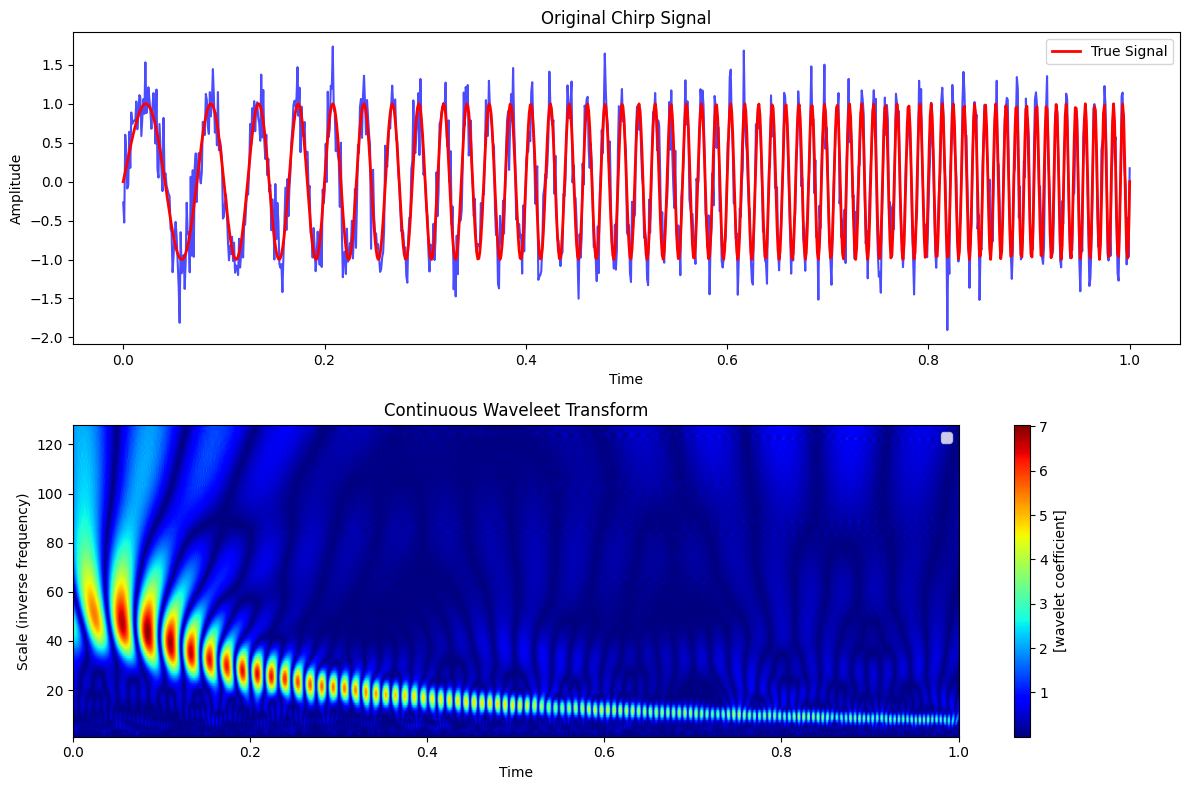

In [5]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

#Generaet chirp signal: frquency increasing with time
t = np.linspace(0, 1, 1000)
chirp = np.sin(2*np.pi*(10*t + 50*t**2))
noise_chirp = chirp + 0.3*np.random.randn(len(t))

# Define scales for wavelet transform
scales=np.arange(1, 128)

#Perform continuous wavelet transform
#'morl' = Morlet wavelet (good for oscilatory signals)
coeffs, freqs = pywt.cwt(noise_chirp, scales, 'morl', sampling_period=t[1]-t[0])

#Create time-frequency plot
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, noise_chirp, 'b-', alpha=0.7)
plt.plot(t, chirp, 'r-', linewidth=2, label='True Signal')
plt.title('Original Chirp Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.imshow(np.abs(coeffs), extent=[t.min(), t.max(), 1, 128], cmap='jet', aspect='auto', origin='lower')
plt.colorbar(label='[wavelet coefficient]')
plt.title('Continuous Waveleet Transform')
plt.xlabel('Time')
plt.ylabel('Scale (inverse frequency)')
plt.legend()

plt.tight_layout()
plt.show()



****
# Hands-On: Time Series Analysis (Physics)

**Topics:** Autocorrelation, ARIMA, Fourier, Wavelets

**Datasets:** Monthly Sunspot Numbers (astronomy/solar physics; bundled with statsmodels).

**Goal:** Apply core time-series tools to a real physics time series and interpret results like a physicist (oscillations, periodicities, prediction).

## Enviroment & Setup


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pywt
#Plot settings
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['axes.grid'] = True


## Load Physics Data: Monthly Sunspot Numbers

Sunpots are a classic physics/astronomy time series with known 11-year-cycles. We use the dataset bundled with statsmodel.

In [7]:
# Load monthly sunspot data
sun = sm.datasets.sunspots.load_pandas().data
sun.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [8]:
# Make a proper datatime index and tidy series
sun['YEAR'] = sun['YEAR'].astype(int)
# The dataset has 'SUNACTIVITY' per **year**, but there's also a monthly version in statsmodels.
# We'll instead use the **monthly** sunspots dataset: 'sm.tsa.datasets.sunspots' (deprecated in some versions).
# Robust path: use the classic yearly first, then try to fetch monthly if available.

try:
  from statsmodels.datasets import sunspots as sm_sun_monthly
  sun_m = sm_sun_monthly.load_pandas().data.copy()
  if 'MONTH' in sun_m.colums:
    sun_m['MONTH'] = sun_m['MONTH'].astype(int)
    sun_m['DATE'] = pd.to_datetime(dict(year=sun_m['YEAR'].astype(int), month=sun_m['MONTH'].astype(int),
                                           day=1))
    ts = pd.Series(sun_m['SUNACTIVITY'].values, index=sun_m['DATE']).sort_index()
  else:
        # Fallback: construct a monthly index from year fractions if present
        if 'PERIOD' in sun_m.columns:
            # PERIOD might be fractional year; convert to datetime approx by month
            years = sun_m['YEAR'].astype(int)
            months = ((sun_m['PERIOD'] - np.floor(sun_m['PERIOD'])) * 12 + 1).round().astype(int).clip(1,12)
            sun_m['DATE'] = pd.to_datetime(dict(year=years, month=months, day=1))
            ts = pd.Series(sun_m['SUNACTIVITY'].values, index=sun_m['DATE']).sort_index()
        else:
            # As last resort, stick to yearly
            ts = pd.Series(sun['SUNACTIVITY'].values, index=pd.to_datetime(sun['YEAR'], format='%Y'))
except Exception:
    # Fall back to yearly data only
    ts = pd.Series(sun['SUNACTIVITY'].values, index=pd.to_datetime(sun['YEAR'], format='%Y'))

ts = ts.asfreq('MS') if ts.index.inferred_type in ('datetime64', 'datetime') else ts
ts = ts.dropna()
ts.name = 'sunspots'
ts.head()


,sunspots
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0


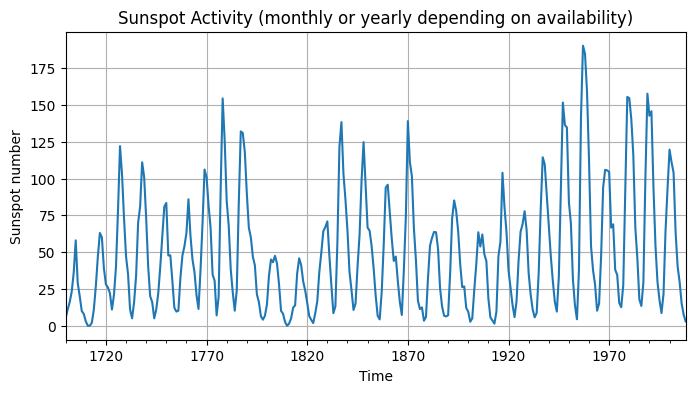

In [9]:
# Quick visualization
ax = ts.plot(title='Sunspot Activity (monthly or yearly depending on availability)')
ax.set_xlabel('Time')
ax.set_ylabel('Sunspot number')
plt.show()


### Task 1.1 — Basic Exploration
1. Compute summary stats: mean, std, min, max.
2. Plot a rolling mean and rolling std (window=24 months if monthly, or window=5 if yearly).
3. Comment: do you see long-term cycles?

In [10]:
ts.rolling(roll_window).mean().plot()

NameError: name 'roll_window' is not defined